In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading CICIDS2017_processed.csv
Data = pd.read_csv('CICIDS2017_processed.csv')

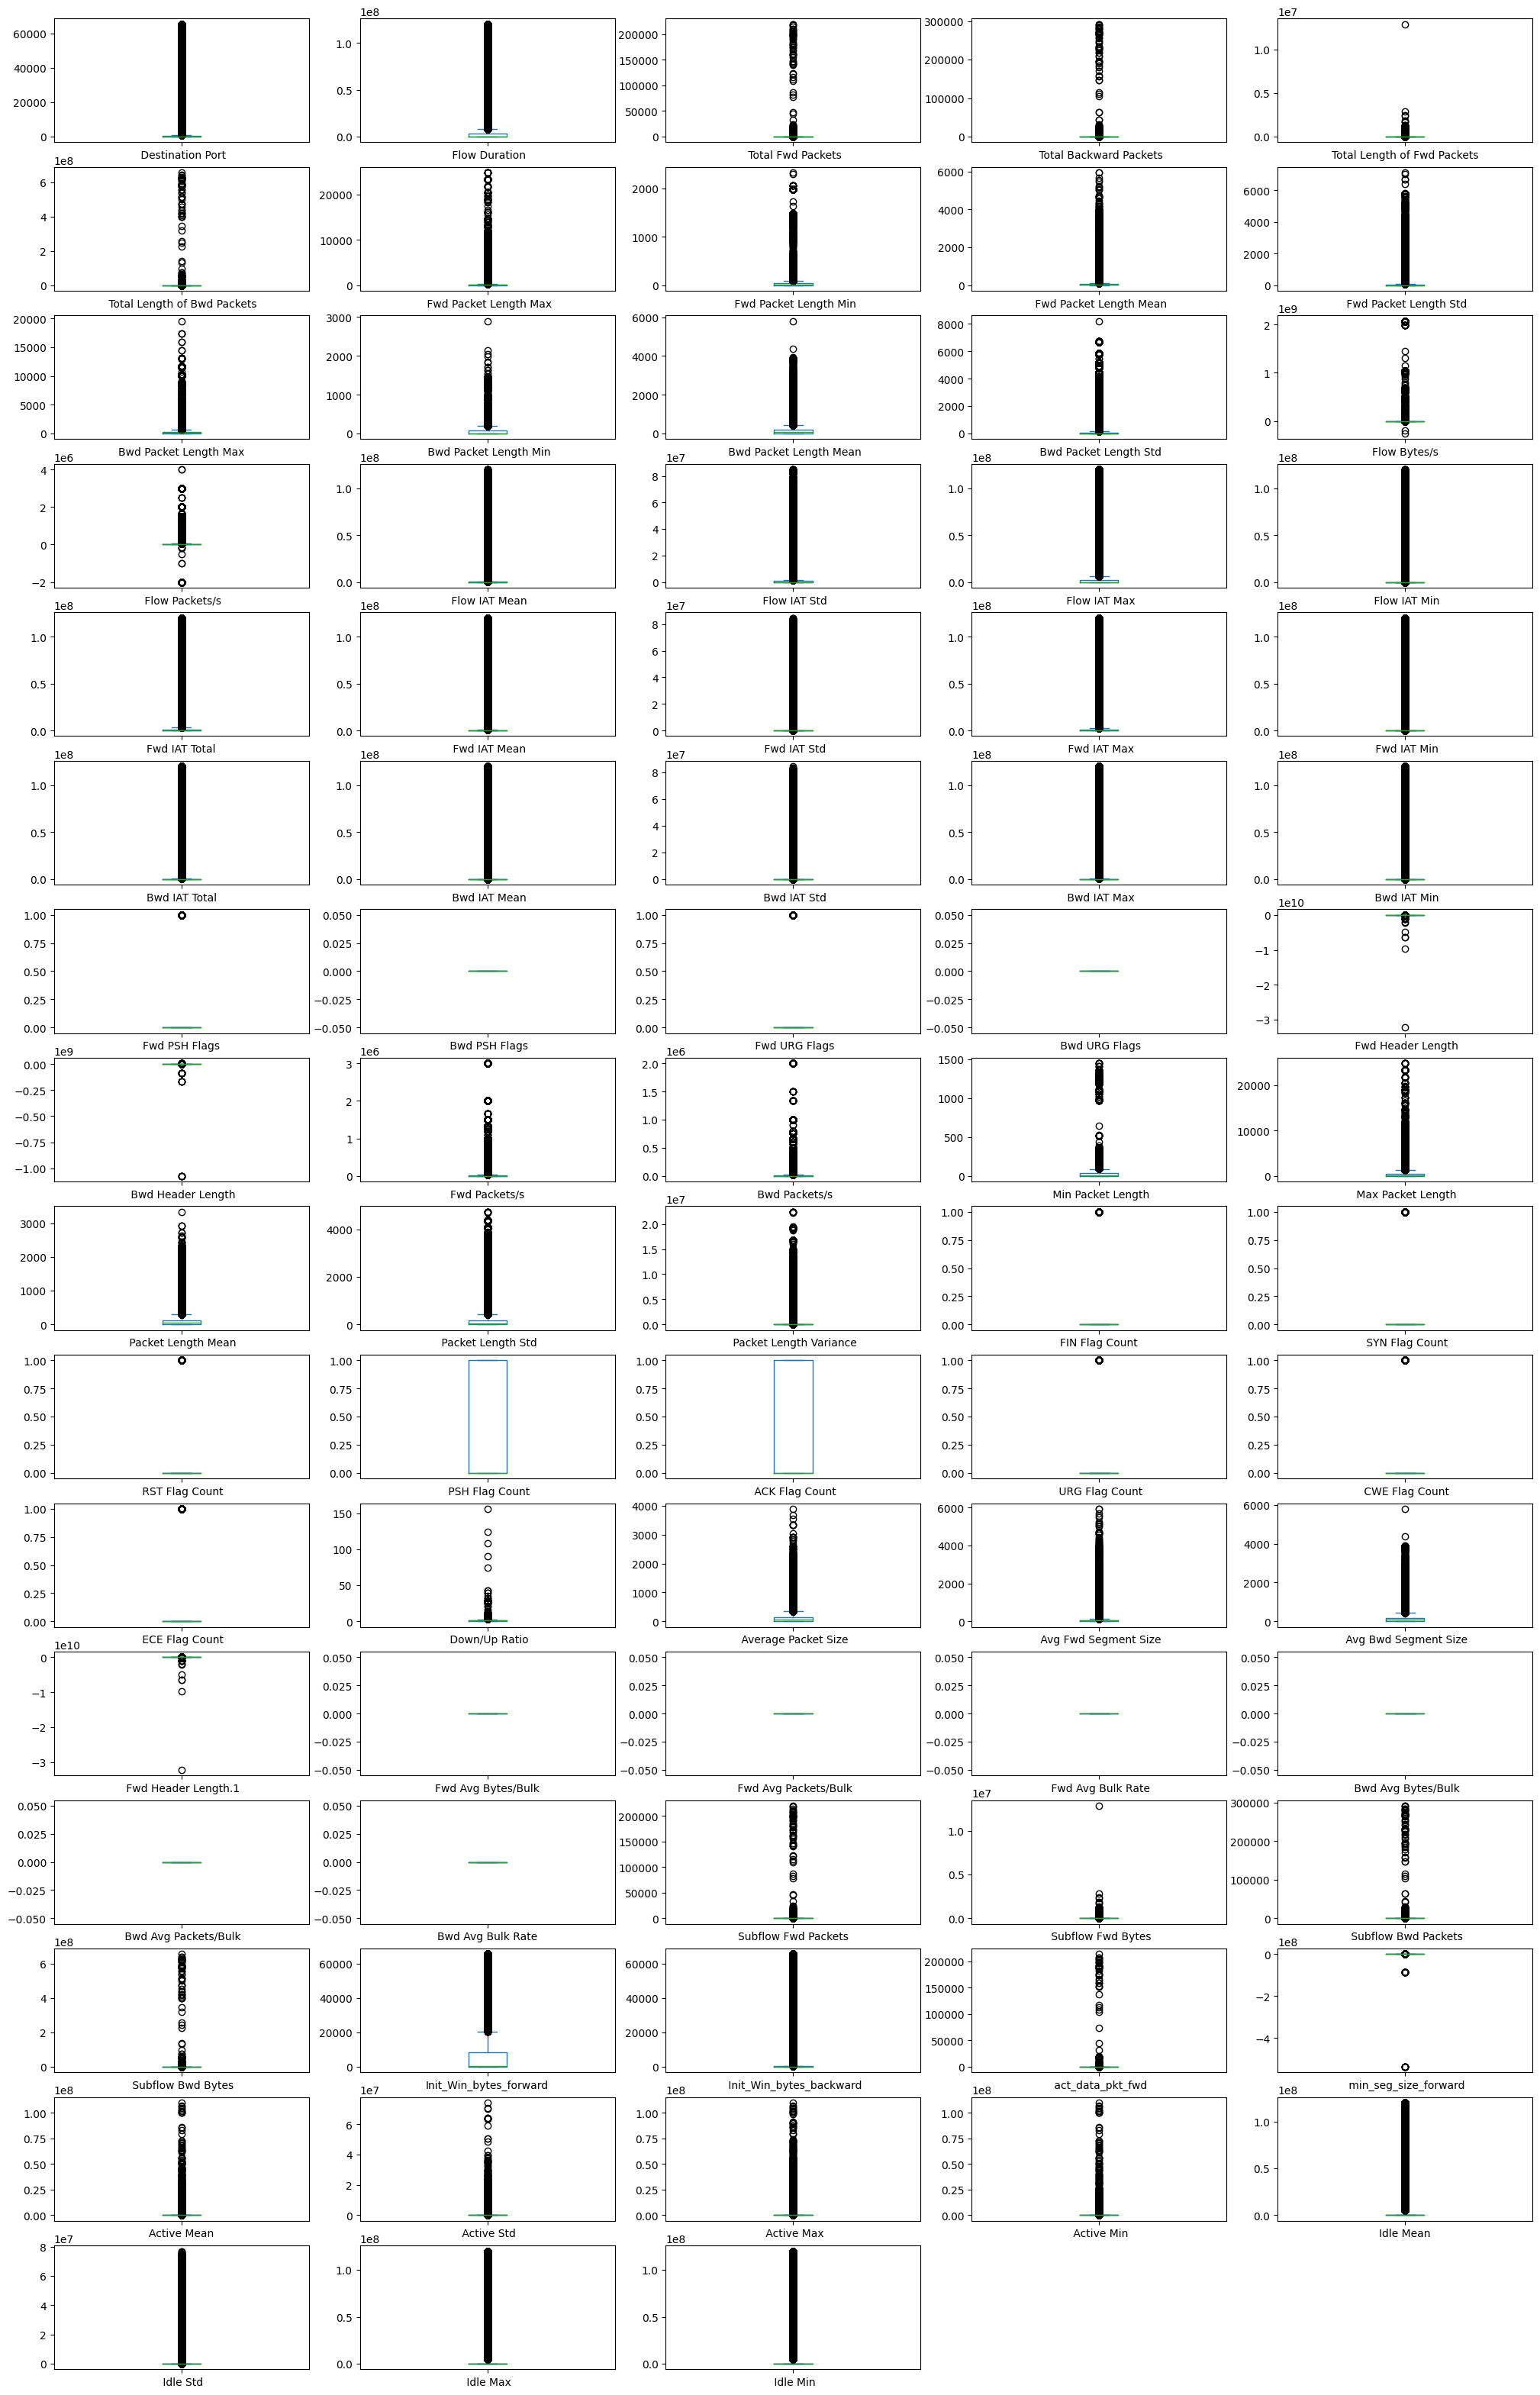

In [ ]:

Data.plot(kind='box', subplots=True, layout=(16,5), figsize=(25,40))
plt.show()


In [ ]:
Data.nunique()

,0
Destination Port,53805
Flow Duration,1050899
Total Fwd Packets,1432
Total Backward Packets,1747
Total Length of Fwd Packets,17928
Total Length of Bwd Packets,64698
Fwd Packet Length Max,5279
Fwd Packet Length Min,384
Fwd Packet Length Mean,99716
Fwd Packet Length Std,253909


In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

print(Data[' Label'].unique())
Data[' Label'] = le.fit_transform(Data[' Label'])
print(Data[' Label'].unique())

['Normal' 'DoS/DDoS' 'Port Scan' 'Botnet' 'Infiltration' 'Web Attack'
 'Brute Force']
[4 2 5 0 3 6 1]


In [4]:
# taking 10000 samples from classes which have more than 10000 also shuffling while extraction

#4	2096484
#2	321775
#5	90819

from sklearn.utils import resample

# Separating majority and minority classes

#labels with 10000+
label_1 = Data[Data[' Label'] == 1]
label_2 = Data[Data[' Label'] == 2]
label_4 = Data[Data[' Label'] == 4]
label_5 = Data[Data[' Label'] == 5]

#labels with less than 10000
label_0 = Data[Data[' Label'] == 0]

label_3 = Data[Data[' Label'] == 3]
label_6 = Data[Data[' Label'] == 6]

# Downsampling majority class

label_1_sam_red = resample(label_1,
                                 replace=False,    # sample without replacement
                                 n_samples=10000,     # to match minority class
                                 random_state=123) # reproducible results

label_2_sam_red = resample(label_2,
                                 replace=False,    # sample without replacement
                                 n_samples=10000,     # to match minority class
                                 random_state=123) # reproducible results

label_4_sam_red = resample(label_4,
                                 replace=False,    # sample without replacement
                                 n_samples=10000,     # to match minority class
                                 random_state=123)

label_5_sam_red = resample(label_5,
                                 replace=False,    # sample without replacement
                                 n_samples=10000,     # to match minority class
                                 random_state=123)

# Combine minority class with downsampled majority class
df_balanced = pd.concat([label_0, label_1_sam_red, label_3, label_6, label_2_sam_red, label_4_sam_red, label_5_sam_red])

# Display new class counts
df_balanced[' Label'].value_counts()


 Label
1    10000
2    10000
4    10000
5    10000
6     2180
0     1966
3       36
Name: count, dtype: int64

In [5]:
#loading features and target

x=df_balanced.drop([' Label'],axis=1).values
y=df_balanced[' Label'].values

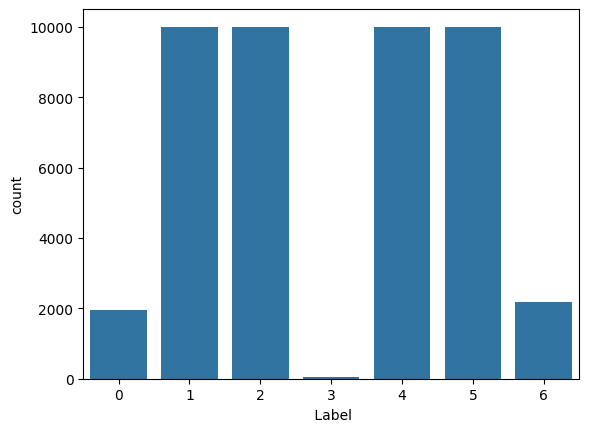

In [6]:
import seaborn as sns
sns.countplot(x=' Label', data=df_balanced)
plt.show()

In [ ]:
pd.Series(y).value_counts()

,count
5,10000
4,10000
2,10000
1,9152
6,2143
0,1953
3,36


In [7]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 2.0 MB/s eta 0:00:00


In [8]:
#Oversampling using smote(Synthetic Minority Over-sampling TEchnique)
#It is a more sophisticated technique than the previous ones.
#Random sampling is easy, but the new samples don’t add more information to the machine learning algorithms. SMOTE improves on that.

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=888)
x, y = smote.fit_resample(x, y)

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [9]:
#ValueError: Input X contains infinity or a value too large for dtype('float64').

#checking for infinite values , replacing with nan and fill them
import pandas as pd
import numpy as np
# Check for infinite values in 'x'
inf_rows = np.isinf(x).any(axis=1)

# Replace infinite values with NaN
x[inf_rows] = np.nan

# Impute NaN values using a suitable method -> mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)

# again smote method
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=888)
x, y = smote.fit_resample(x, y)

In [ ]:
pd.Series(y).value_counts()

,count
0,10000
1,10000
3,10000
6,10000
2,10000
4,10000
5,10000


<Axes: xlabel='0'>

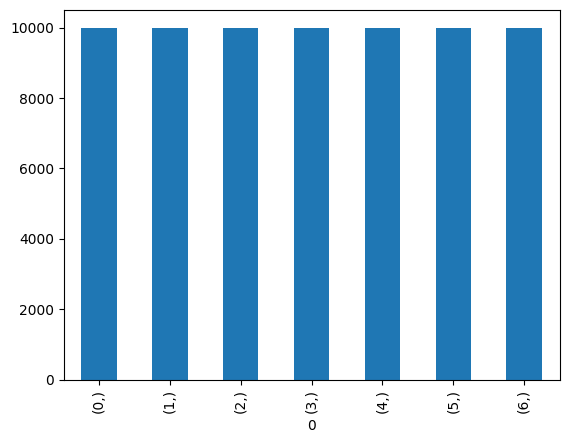

In [ ]:
pd.DataFrame(y).value_counts().plot(kind='bar')

In [11]:
#Normalization
#minmax scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x)


In [17]:
# To Save the scaler to a pickle file

with open('minmax_scaler.pkl', 'wb') as f:
  pickle.dump(scaler, f)


In [18]:
# save in drive

!cp minmax_scaler.pkl /content/drive/MyDrive/DDOS/M2/Scaling_Pickle


In [12]:
#spliting train and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3)

In [14]:
# Save training data
pd.DataFrame(X_train).to_csv('X_train.csv', index=False)
pd.DataFrame(Y_train).to_csv('y_train.csv', index=False)

# Save testing data
pd.DataFrame(X_test).to_csv('X_test.csv', index=False)
pd.DataFrame(Y_test).to_csv('y_test.csv', index=False)

In [16]:
# save in drive

!cp X_train.csv /content/drive/MyDrive/DDOS/M2/Train_Test_Data
!cp y_train.csv /content/drive/MyDrive/DDOS/M2/Train_Test_Data
!cp X_test.csv /content/drive/MyDrive/DDOS/M2/Train_Test_Data
!cp y_test.csv /content/drive/MyDrive/DDOS/M2/Train_Test_Data
